### train 1k, test 1k, SVM

In [34]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [35]:
train = pd.read_csv('../Data/train_1k.csv',header=None)
test = pd.read_csv('../Data/test_1k.csv',header=None)

In [36]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# train 정답의 숫자 빈도 확인
train[0].value_counts().sort_index()

0     98
1    116
2     99
3     93
4    105
5     92
6     94
7    117
8     87
9    100
Name: 0, dtype: int64

In [39]:
# train data의 내용 보기
temp = np.array(train.loc[0,train.columns!=0])
print(temp.reshape(28,28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [40]:
tempColumns = []
temp1 = temp.reshape(28,28)
count = 0
for i in range(0,29):
    if i%2 == 1:
        for j in range(0,29):
            if j%2 == 1:
                tempColumns.append(temp1[i,j])
                count+=1
count

196

In [41]:
np.sqrt(196)

14.0

In [42]:
print(np.array(tempColumns).reshape(14,14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


> 각각 의미가 있는 숫자들이므로 One-Hot Encoding이 필요없다.

In [43]:
train_label = train.loc[:,train.columns==0]
train_data = train.loc[:,train.columns!=0]

test_label = test.loc[:,test.columns==0]
test_data = test.loc[:,test.columns!=0]

In [44]:
# 학습하기
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.8751248751248751

In [45]:
import matplotlib.pyplot as plt

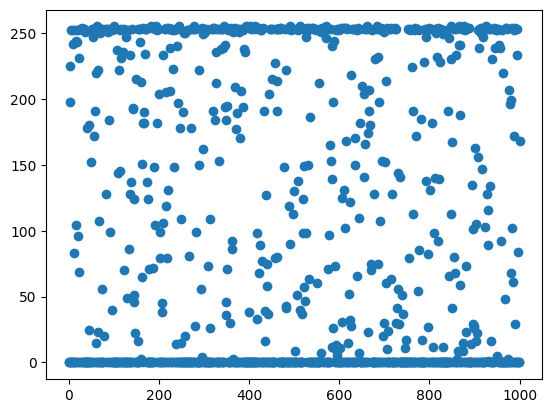

In [46]:
plt.scatter(train_data.index, train_data[300])
plt.show()

### 로그 변환
큰 값을 작은 값으로 표시
- 글씨의 굵기, 세기 등은 크게 의미가 없으므로 제거하기 위한 용도로 사용한다

기본적으로 log안의 x값은 양수만 가능하다.   
하지만 0에 가까운 아주 작은 양수의 경우 (ex. 0.0000000001)  
음의 무한대에 가까워지게 된다. (=너무 작은 값의 경우 프로그램 계산이 -inf로 나옴)   
이를 방지하기 위해 1을 더함으로써 0보다 큰 양수의 값을 갖게 된다. (1p를 사용하는 이유; 표준화)  

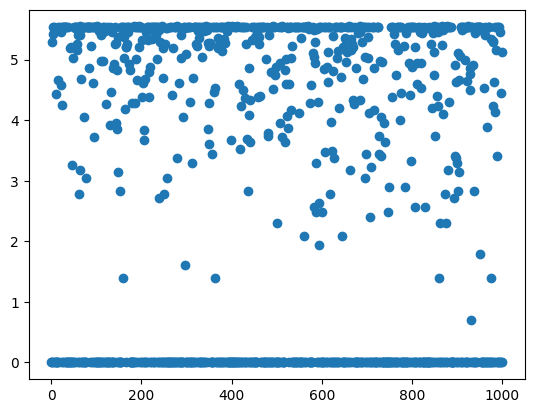

In [47]:
plt.scatter(train_data.index, np.log1p(train_data[300])) # 1p=1plus
plt.show()

In [48]:
# data의 표준화
train_data = pd.DataFrame(np.log1p(train_data))
# train_label = pd.DataFrame(np.log1p(train_label))
train_data.head()


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
test_data = pd.DataFrame(np.log1p(test_data))
# test_label = pd.DataFrame(np.log1p(test_label))
test_data.head()


,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
train_data = train_data.loc[:,train_data.columns!=0.0]
test_data = test_data.loc[:,test_data.columns!=0.0]

In [51]:
# 학습하기
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data, train_label)
clf.score(test_data, test_label)

0.8901098901098901

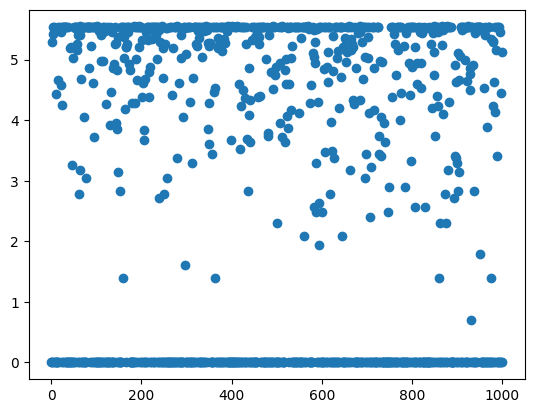

In [52]:
plt.scatter(train_data.index, train_data[300]) # 1p=1plus
plt.show()

# train 10k, test 1k, SVM, log

In [53]:
train10 = pd.read_csv('../Data/train_10k.csv',header=None)
test1 = pd.read_csv('../Data/test_1k.csv',header=None)

In [54]:
train10.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test1.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# train10 정답의 숫자 빈도 확인
train10[0].value_counts().sort_index()

0    1001
1    1127
2     991
3    1032
4     980
5     863
6    1014
7    1070
8     944
9     978
Name: 0, dtype: int64

In [57]:
# train10 data의 내용 보기
temp = np.array(train10.loc[0,train10.columns!=0])
# 데이터 개수 확인
# print(temp.reshape(28,28))

In [58]:
tempColumns = []
temp1 = temp.reshape(28,28)
count = 0
for i in range(0,29):
    if i%2 == 1:
        for j in range(0,29):
            if j%2 == 1:
                tempColumns.append(temp1[i,j])
                count+=1
count

196

In [59]:
np.sqrt(196)

14.0

In [60]:
print(np.array(tempColumns).reshape(14,14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [61]:
train10_label = train10.loc[:,train10.columns==0]
train10_data = train10.loc[:,train10.columns!=0]
test1_label = test1.loc[:,test1.columns==0]
test1_data = test1.loc[:,test1.columns!=0]

In [62]:
clf = svm.SVC()
clf.fit(train10_data, train10_label)
clf.score(test1_data, test1_label)

0.9470529470529471

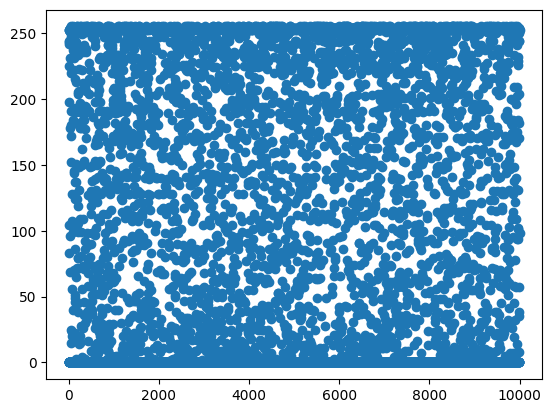

In [63]:
plt.scatter(train10_data.index, train10_data[300])
plt.show()